# Ecuacion de Dirichlet 
Inciso a)

La solución de la ecuación 
$$\frac{\partial ^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0$$
sujeta a las condiciones de frontera:
$$u(0,y)=u(1,y)=0, \;\;\; 0<x<1$$
Y la condición inicial:
$$u(x,0)=100, u(x,1)=200\;\;0<y<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,y)=\sum_{n=1}^{\infty} [ \frac{200(1-(-1)^n)}{n \pi} \cosh(n\pi y) + (\frac{-200(1-(-1)^n)}{n \pi} \cosh(n\pi)+ \frac{400(1-(-1)^n)}{n\pi})\frac{\sinh (n \pi y)}{\sinh (n\pi)}].$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [2]:
from pylab import *
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.style as style
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
from math import *


Para empezar, graficamos la condición inicial.
u(x,0)=100

In [3]:
def g(x):
    if (x<1 and x>0):
      return 100
    else: 
      return 0

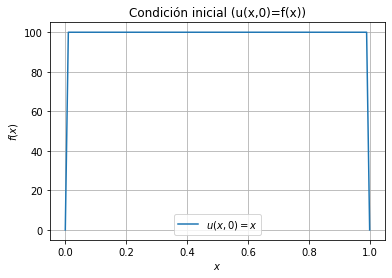

In [4]:
x = []
y = []
for k in range (101):
  x.append(0.01*k)
  y.append(g(0.01*k))

plot(x,y,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
grid()
legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=100$.

In [5]:
def u_0(x,N): # N es el número de armónicos
    a = 0
    for n in range(1,N+1):
        a += ((((-1)**(n)-1)/n)*sin(n*pi*x))
    return (-200/pi)*a

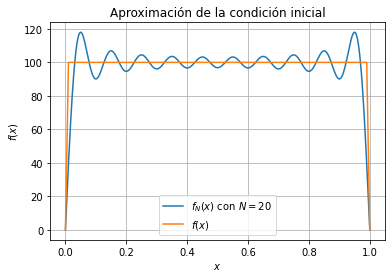

In [6]:
x1=[]
y1=[]
for i in range (1001):
  x1.append(0.001*i)
  y1.append(u_0(0.001*i,20))

plot(x1,y1,label='$f_N(x)$ con $N=20$')
plot(x,y,label='$f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
grid()
legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

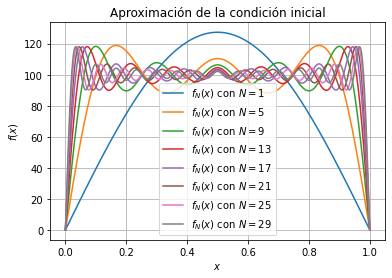

In [7]:
def Armonicos(lista,N):
  l=[]
  for t in range(len(lista)):
    l.append(u_0(lista[t],N))
  return l
  
for i in range(1,30,4):
    plot(x1,Armonicos(x1,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
grid()
legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [8]:
def U(x,y):
    f = 0
    for n in range(1,50):
            f += ( -(200/pi)*( ((-1)**n-1)/n )*cosh(n*pi*y) + (200/pi)*( ((-1)**n-1)/n )*cosh(n*pi)*(sinh(n*pi*y)/sinh(n*pi)) + (-400*((-1)**n-1)/(pi*n))*(sinh(n*pi*y)/sinh(n*pi)) )*sin(n*pi*x)
    return f

y2=[]
for n_2 in range (len(x1)):
  y2.append(U(x1[n_2],0))
    
 
 

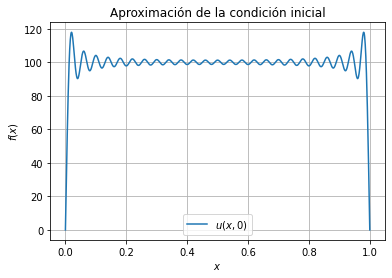

In [9]:

plt.plot(x1,y2,label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
grid()
legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

ValueError: ignored

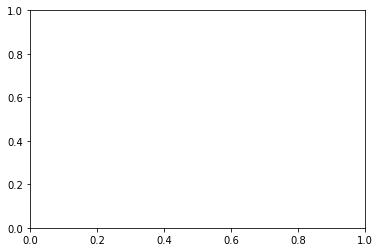

In [13]:
def u_n(lista,t):
  l=[]
  for n in range(len(lista)):
    l.append(U(lista[n],t))
    return l

  for t_2 in range(0,18,2):
    v=round(0.01*t_2,2)
    plt.plot(x1,u_n(x1,0.01*t_2), label='u(x,%r'%v)


plt.plot(x1,u_n(x1,1), label='u(x,1)')

plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
grid()
legend()
show()

Y podemos ver esto en una gráfica en 3D.

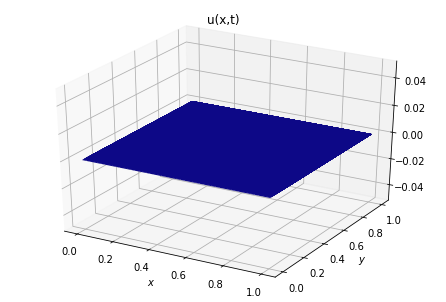

In [11]:


X= np.linspace(0,1)
valores=[]
for j in range(18):
  valores.append(0.01*j)

  valores.append(1)

Y = np.array(valores)

X,Y = np.meshgrid(X,Y)

def W(x,t):
  m=np.zeros(np.shape(x))
  for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
      m[i][j]=U(x[i][j],t[i][j])
      return m

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, W(X,Y), rstride=1, cstride=1, cmap=cm.plasma); #Otros colores:"viridis", "inferno", "plasma"

plt.xlabel('$x$'); plt.ylabel('$y$'); 
plt.title("u(x,t)")
show()
